In [6]:
import math
import random
import matplotlib.pyplot as plt

In [7]:
def random_kid():
    """
    The method choice() returns a random item from a list, tuple, or string.
    
    This method returns a random item.
    import random

    print "choice([1, 2, 3, 5, 9]) : ", random.choice([1, 2, 3, 5, 9])
    print "choice('A String') : ", random.choice('A String')
    """
    return random.choice(["boy","girl"])
    
    

In [8]:
def uniform_pdf(x):
    
    """
    dist = scipy.stats.uniform(...)
    http://www.personal.soton.ac.uk/jav/soton/HELM/workbooks/workbook_38/38_2_uniform_dist.pdf
    
    The function f(x) is defined by:
f(x) = 1 / (b-a)  if a <= x <=b
f(x) = 0 otherwise


    """
    
    #here we are assuming a = 0 and b=1
    return 1 if x >= 0 and x < 1 else 0


In [9]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    
    if x < 0 : return 0  #uniform random is never less than 0
    elif x < 1 : return x #e.g.  P( X < 0.4 ) = 0.4
    else: return 1   #uniform random is always less than 1
    
    

In [10]:
def normal_pdf(x, mu=0, sigma=1):
    """
    https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm
    
    A mean of zero and a standard deviation of one are considered 
    to be the default values for a normal distribution on the calculator,
    if you choose not to set these values.
    
    https://mathbits.com/MathBits/TISection/Statistics2/normaldistribution.htm
    
    The general formula for the probability density function of the normal
    distribution is
    f(x)=e−(x−μ)2/(2σ2)σ2π√

    where μ is the location parameter and σ is the scale parameter.
    The case where μ = 0 and σ = 1 is called the standard normal distribution.
    The equation for the standard normal distribution is

    f(x)=e−x2/22π√

    Since the general form of probability functions can be expressed in terms of the standard distribution, all subsequent formulas in this section are given for the standard form of the function.

    
    
    
    
    """
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2))
    
    

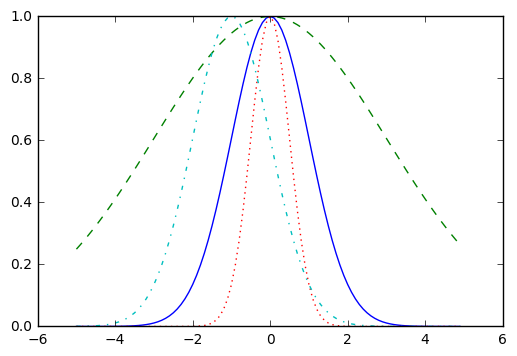

In [33]:
def plot_normal_pdfs(plt):
    xs = [ x / 10.0 for x in range(-50,50)]
    #print(xs)
    #print([normal_pdf(x,sigma=1) for x in xs])
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0 ,sigma=1')
    #plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu =0 , sigma =2')
    plt.plot(xs,[normal_pdf(x,sigma=3) for x in xs],'--',label='mu =0 , sigma =2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu =0, sigma =0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)for x in xs],"-.",label='mu=-1 , sigma =1 ')
    plt.show()
    
    

plot_normal_pdfs(plt)

   

In [38]:
"""
poisson distribution

https://www.youtube.com/watch?v=GYPxXB0bmPc&t=648s

https://www.itl.nist.gov/div898/handbook/eda/section3/eda366j.htm

The Poisson distribution is used to model the number of events occurring within a given time interval.
The formula for the Poisson probability mass function is

p(x;λ)=(e to power −λ)(λ to power x)/x! for x=0,1,2,⋯

λ is the shape parameter which indicates the average number of events in the given time interval.



"""

'\npoisson distribution\n\nhttps://www.youtube.com/watch?v=GYPxXB0bmPc&t=648s\n\nhttps://www.itl.nist.gov/div898/handbook/eda/section3/eda366j.htm\n\nThe Poisson distribution is used to model the number of events occurring within a given time interval.\nThe formula for the Poisson probability mass function is\n\np(x;λ)=(e to power −λ)(λ to power x)/x! for x=0,1,2,⋯\n\nλ is the shape parameter which indicates the average number of events in the given time interval.\n\n\n\n'

In [41]:
def normal_cdf(x,mu=0,sigma=1):
    """
    
    The cumulative distribution function (cdf) is the probability
    that the variable takes a value less than or equal to x. That is.
    For a continuous distribution, this can be expressed mathematically as.
    
    
    
    
    math.erf(x)
    Return the error function at x.

    The erf() function can be used to compute traditional statistical
    functions such as the cumulative standard normal distribution:

    def phi(x):
        'Cumulative distribution function for the standard normal distribution'
        return (1.0 + erf(x / sqrt(2.0))) / 2.0


    """
    
    return  ( 1 + math.erf((x - mu) / math.sqrt(2) / sigma )) / 2


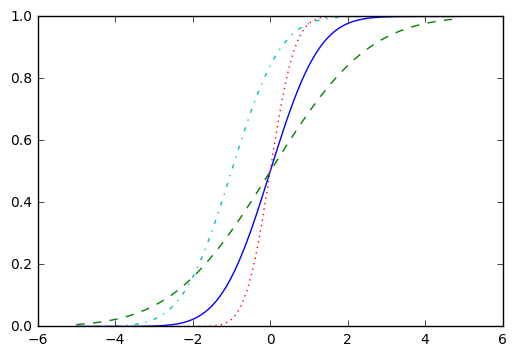

In [45]:
def plot_normal_cdfs(plt):
    xs = [ x / 10.0 for x in range(-50,50)]
    
    plt.plot(xs, [ normal_cdf(x,sigma=1) for x in xs ],'-',label='mu =0 sigma=1')
    plt.plot(xs, [normal_cdf(x,sigma=2 ) for x in xs],'--',label='mu=0 sigma =2')
    plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs, [normal_cdf(x,mu=-1)for x in xs],'-.',label='mu=-1 ,sigma=1')
    
    plt.show()
    
    
plot_normal_cdfs(plt)    




# Inverse normal distributions need to under stand

In [46]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    """
    
    https://stats.stackexchange.com/questions/265925/what-is-inverse-cdf-normal-distribution-formula?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
    
    https://math.stackexchange.com/questions/1689581/inverse-standard-normal-cdf?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
    """
    
    
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z


In [ ]:
def bernoulli_trial(p):
    """
    
    http://www.statisticshowto.com/bernoulli-distribution/
    
    
    A Bernouilli distribution is a discrete probability distribution 
    for a Bernouilli trial — a random experiment that has only two 
    outcomes (usually called a “Success” or a “Failure”). 
    For example, the probability of getting a heads (a “success”) 
    while flipping a coin is 0.5. 
    The probability of “failure” is 1 – P (1 minus the probability of success,
    which also equals 0.5 for a coin toss).
    It is a special case of the binomial distribution for n = 1.
    In other words, it is a binomial distribution with a single trial
    (e.g. a single coin toss).
    
    The probability of a failure is labeled on the x-axis as 0 
    and success is labeled as 1. In the following Bernoulli distribution,
    the probability of success (1) is 0.4, and
    the probability of failure (0) is 0.6:
    
    The probability density function (pdf) for this distribution is px (1 – p)1 – x, which can also be written as:
pdf bernoulli



    
    
    
    
    """
    return 1 if random.random() < p else 0

In [51]:
def binomial(p,n):
    
    """
    https://stackoverflow.com/questions/818828/is-it-possible-to-implement-a-python-for-range-loop-without-an-iterator-variable?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
        
        
down vote
accepted
Off the top of my head, no.

I think the best you could do is something like this:

def loop(f,n):
    for i in xrange(n): f()

loop(lambda: <insert expression here>, 5)
But I think you can just live with the extra i variable.

Here is the option to use the _ variable, which in reality, is just another variable.

for _ in range(n):
    do_something()
Note that _ is assigned the last result that returned in an interactive python session:

>>> 1+2
3
>>> _
3
For this reason, I would not use it in this manner. I am unaware of any idiom as mentioned by Ryan. It can mess up your interpreter.

>>> for _ in xrange(10): pass
...
>>> _
9
>>> 1+2
3
>>> _
9
And according to python grammar, it is an acceptable variable name:

identifier ::= (letter|"_") (letter | digit | "_")*
    
    
    
    for _ in range(5):
    some_oper....
    
    
    it means u need to the some_oper... n times.
    
    
    
    --------------------------------------
    
    
    http://www.statisticshowto.com/binomial-distribution-formula/
    
    
    https://www.mathsisfun.com/data/binomial-distribution.html
    
    
    
    
    
    
    https://www.mathsisfun.com/data/index.html
    
    
    A Bernoulli random variable has two possible outcomes: 0 or 1.
    A binomial distribution is the sum of independent and identically 
    distributed Bernoulli random variables.
    
    
    
    """
    
    return sum(bernoulli_trial(p) for _ in range(n))
    
    
    
    
    
  

# make histogram need to understand


In [52]:
def make_his(p,n,num_points):
    
    data = [binomial(p,n) for _ in range(num_points)]
    
    #use a bar chart to show the actual binomial samples
    
    histogram = Counter(data)
    
    plt.bar( [ x - 0.4 for x in histogram.keys() ], [v / num_pionts for v in histgram.values()],0.8,color='0.75')
    
    
    mu = p * n
    
    sigma = math.sqrt(n*p*(1-p))
    
    
    #use a line chart to show the normal approximation
    
    xs = range(min(data),max(data)+1)
    
    ys = [ normal_cdf(i + 0.5 , mu, sigma) - normal_cdf(i-0.5,mu,sigma) for i in xs]
    
    plt.plot(xs,ys)
    plt.show()

In [57]:
"""

All the other answers don't seem to explain the use of random.seed(). Here is a simple example (source):

import random
random.seed( 3 )
print "Random number with seed 3 : ", random.random() #will generate a random number 
#if you want to use the same random number once again in your program
random.seed( 3 )
random.random()   # same random number as before



"""



if __name__ == "__main__":

    #
    # CONDITIONAL PROBABILITY
    #

    both_girls = 0
    older_girl = 0
    either_girl = 0

    random.seed(0)
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == "girl":
            older_girl += 1
        if older == "girl" and younger == "girl":
            both_girls += 1
        if older == "girl" or younger == "girl":
            either_girl += 1

    print ("P(both | older): ", both_girls / older_girl)      # 0.514 ~ 1/2
    print ("P(both | either): ", both_girls / either_girl )  # 0.342 ~ 1/3

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325
